In [65]:
%matplotlib widget

In [66]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [67]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [68]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [69]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20

# Code Here

house_sample_set = [housing_data.sample(div) for x in range(0,nsamples)]


In [70]:
# Calculate means
means = [np.mean(sample["MEDV"]) for sample in house_sample_set]
# Calculate standard error on means
standard_errors = [sem(sample["MEDV"]) for sample in house_sample_set]
x_axis = np.arange(0,len(house_sample_set)) + 1



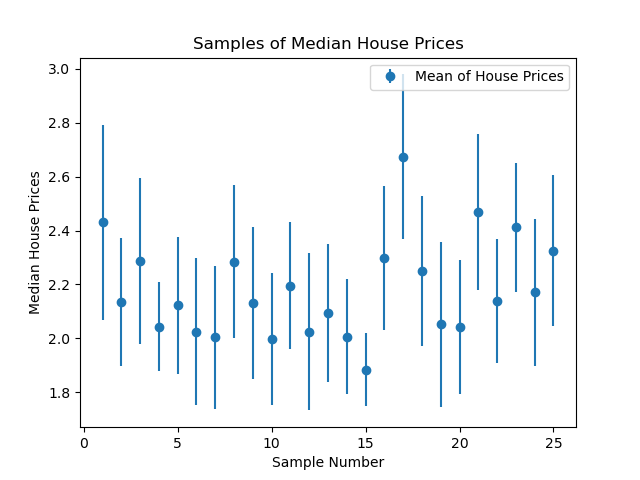

In [71]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt = "o", label ="Mean of House Prices")
ax.legend(loc = "best")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Median House Prices")
ax.set_title("Samples of Median House Prices")
plt.show()

In [72]:
# Calculate the range of SEM values
sem_min = np.min(standard_errors)
sem_max = np.max(standard_errors)
sem_range = sem_max - sem_min
print(sem_range)

0.22784853464040405


In [73]:
# Determine which sample's mean is closest to the population mean
pop_mean = np.mean(housing_data['MEDV'])
closest_index = np.abs(means - pop_mean).argmin()
print(closest_index)
print(means)

18
[2.4307019999999997, 2.1342499999999998, 2.2865504999999997, 2.0433000000000003, 2.1216005000000004, 2.0240505, 2.0027005000000004, 2.2831010000000003, 2.1316005, 1.9974505, 2.1944005000000004, 2.023601, 2.0941505000000005, 2.0054005, 1.88315, 2.2975510000000003, 2.6736510000000004, 2.2493505, 2.051351, 2.0409505, 2.468851, 2.1375504999999997, 2.4113, 2.17, 2.3252005000000002]


In [76]:
# Compare to the population mean
print(f"The closes sample mean was sample 19 with a mean of  {means[18]}")
print(f"While, the population mean was {pop_mean}")

The closes sample mean was sample 19 with a mean of  2.051351
While, the population mean was 2.068558169089147
